In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pyarrow as pa
import pyarrow.parquet as pq
import time
#import regression module
from pycaret.classification import *

# too see max columns
pd.set_option('display.max_columns',None)

In [3]:
#churn_df = pd.read_parquet("../Data/churn_cleaned.parquet")
churn_df = pd.read_csv("../Data/churn_cleaned.csv")

In [4]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
exp_clf = setup(churn_df, target = 'Churn',silent=True,session_id=1)

,Description,Value
0,session_id,1
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
get_config('X')

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_0,Partner_No,Dependents_No,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,29.850000,29.850000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34.0,56.950001,1889.500000,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,53.849998,108.150002,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,45.0,42.299999,1840.750000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2.0,70.699997,151.649994,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24.0,84.800003,1990.500000,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7039,72.0,103.199997,7362.899902,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7040,11.0,29.600000,346.450012,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,4.0,74.400002,306.600006,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
# Compare all models in model library
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8006,0.8427,0.5309,0.6727,0.5918,0.4624,0.4692,0.0400
lr,Logistic Regression,0.8004,0.8379,0.5391,0.6662,0.5947,0.4644,0.4698,0.4560
ridge,Ridge Classifier,0.7982,0.0000,0.5153,0.6689,0.5813,0.4514,0.4585,0.0050
gbc,Gradient Boosting Classifier,0.7974,0.8417,0.5257,0.6624,0.5853,0.4537,0.4596,0.0990
lda,Linear Discriminant Analysis,0.7937,0.8305,0.5489,0.6425,0.5911,0.4544,0.4576,0.0100
catboost,CatBoost Classifier,0.7917,0.8328,0.5242,0.6451,0.5780,0.4417,0.4462,1.2370
lightgbm,Light Gradient Boosting Machine,0.7882,0.8242,0.5279,0.6337,0.5753,0.4359,0.4396,0.1910
rf,Random Forest Classifier,0.7819,0.8178,0.4952,0.6260,0.5525,0.4110,0.4162,0.0980
xgboost,Extreme Gradient Boosting,0.7728,0.8114,0.5086,0.5974,0.5485,0.3983,0.4011,0.3440
et,Extra Trees Classifier,0.7716,0.7895,0.4854,0.6002,0.5361,0.3869,0.3912,0.1050


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

## ADA Boost Classifier Model

In [8]:
# Create Gradient Boosting Model
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7992,0.8339,0.4851,0.6842,0.5677,0.4418,0.4529
1,0.8154,0.8649,0.5075,0.7312,0.5991,0.4843,0.4979
2,0.7911,0.8369,0.4925,0.6535,0.5617,0.4281,0.4355
3,0.7627,0.8152,0.5075,0.5714,0.5375,0.3787,0.3799
4,0.8174,0.8496,0.5149,0.7340,0.6053,0.4912,0.5043
5,0.8276,0.8801,0.5373,0.7579,0.6288,0.5207,0.5338
6,0.8195,0.8432,0.6194,0.6860,0.6510,0.5297,0.5309
7,0.8032,0.8460,0.5672,0.6609,0.6104,0.4799,0.4824
8,0.7708,0.8156,0.5299,0.5868,0.5569,0.4028,0.4038
9,0.7992,0.8418,0.5481,0.6607,0.5992,0.4668,0.4704


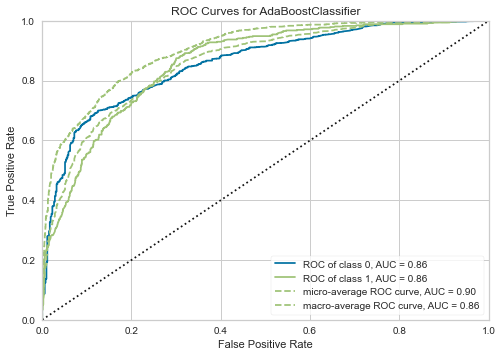

In [9]:
# Plot Model
plot_model(ada)

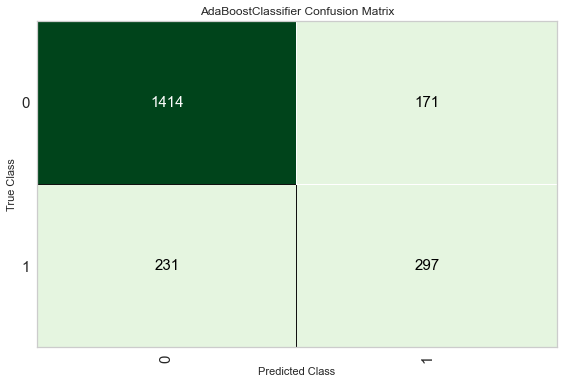

In [10]:
# Plot Confusion Matrix
plot_model(ada, plot = 'confusion_matrix')

In [11]:
# Evaluate Model
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
#generate predictions on hold-out set using trained model
ada_predictions_holdout = predict_model(ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8097,0.8586,0.5625,0.6346,0.5964,0.4725,0.4740


In [13]:
# Finalize model
finalize_model(ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [14]:
# deploy trained ADA model on cloud
#deploy_model(model = lr, model_name = 'deploy_lr', platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [15]:
# Save ADA Model
#save_model(model, model_name, verbose=True)

## Calibrate trainined ADA model

In [16]:
calibrated_ada = calibrate_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7911,0.8340,0.4104,0.6962,0.5164,0.3943,0.4167
1,0.8114,0.8654,0.4552,0.7531,0.5674,0.4560,0.4797
2,0.7931,0.8388,0.4627,0.6739,0.5487,0.4204,0.4329
3,0.7748,0.8191,0.4627,0.6139,0.5277,0.3837,0.3903
4,0.8256,0.8493,0.5000,0.7791,0.6091,0.5036,0.5241
5,0.8235,0.8807,0.4925,0.7765,0.6027,0.4965,0.5178
6,0.8215,0.8398,0.5746,0.7130,0.6364,0.5199,0.5252
7,0.8114,0.8470,0.5373,0.6990,0.6076,0.4862,0.4935
8,0.7708,0.8141,0.4403,0.6082,0.5108,0.3661,0.3743
9,0.7931,0.8433,0.4667,0.6774,0.5526,0.4239,0.4364


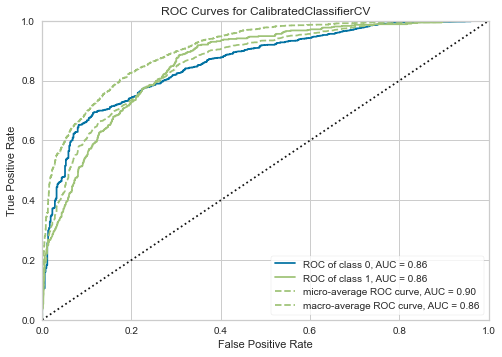

In [17]:
# Plot Model
plot_model(calibrated_ada)

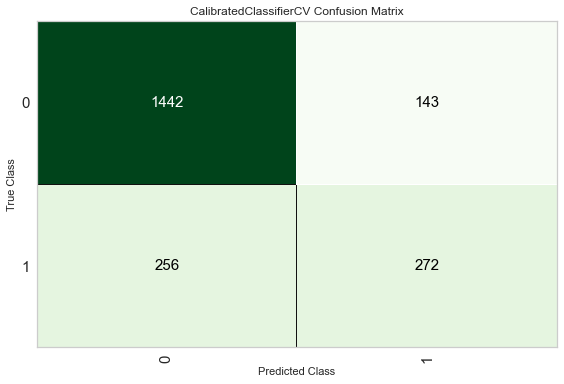

In [18]:
# Plot Confusion Matrix
plot_model(calibrated_ada, plot = 'confusion_matrix') 

In [19]:
# Evaluate Model
evaluate_model(calibrated_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
finalize_model(calibrated_ada)

CalibratedClassifierCV(base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                         base_estimator=None,
                                                         learning_rate=1.0,
                                                         n_estimators=50,
                                                         random_state=1),
                       cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                       method='sigmoid')

## Tuned ADA Boost Classifier Model

In [21]:
# Tune Model
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8093,0.8364,0.5149,0.7041,0.5948,0.4741,0.4840
1,0.8174,0.8678,0.5299,0.7245,0.6121,0.4964,0.5068
2,0.7931,0.8363,0.5075,0.6538,0.5714,0.4379,0.4440
3,0.7647,0.8183,0.4776,0.5818,0.5246,0.3703,0.3734
4,0.8316,0.8509,0.5672,0.7525,0.6468,0.5391,0.5484
5,0.8296,0.8820,0.5597,0.7500,0.6410,0.5324,0.5422
6,0.8073,0.8407,0.6045,0.6585,0.6304,0.5004,0.5012
7,0.8032,0.8464,0.5672,0.6609,0.6104,0.4799,0.4824
8,0.7708,0.8161,0.5224,0.5882,0.5534,0.3999,0.4012
9,0.7992,0.8401,0.5333,0.6667,0.5926,0.4615,0.4666


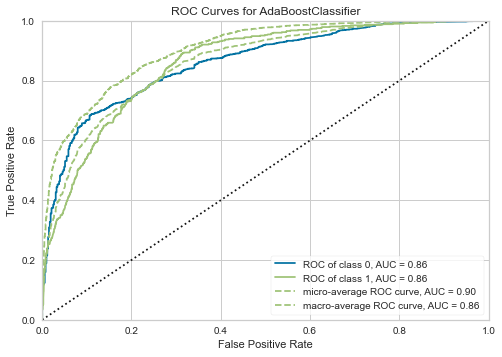

In [22]:
# Plot Model
plot_model(tuned_ada)

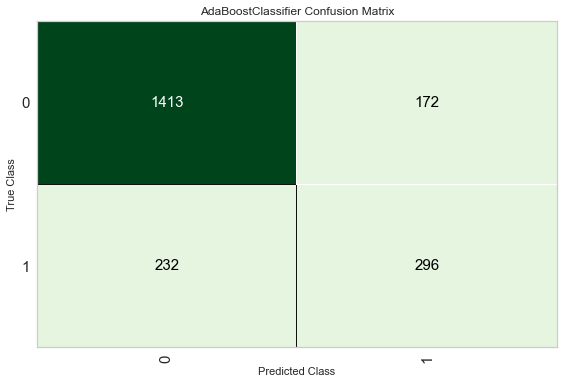

In [23]:
# Plot Confusion Matrix
plot_model(tuned_ada, plot = 'confusion_matrix') 

In [24]:
# Evaluate Model
evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
finalize_model(tuned_ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=300, random_state=1)

## Blend Specific Models

In [26]:
#create Logistic Regression model for blending
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7951,0.8334,0.5075,0.6602,0.5738,0.4420,0.4486
1,0.8012,0.8451,0.4776,0.6957,0.5664,0.4431,0.4563
2,0.7951,0.8303,0.5373,0.6486,0.5878,0.4530,0.4566
3,0.7586,0.7993,0.4701,0.5676,0.5143,0.3556,0.3584
4,0.8215,0.8441,0.5373,0.7347,0.6207,0.5076,0.5182
5,0.8195,0.8694,0.5672,0.7103,0.6307,0.5132,0.5189
6,0.8053,0.8350,0.6343,0.6439,0.6391,0.5058,0.5058
7,0.8114,0.8592,0.5597,0.6881,0.6173,0.4939,0.4985
8,0.7789,0.8165,0.5299,0.6068,0.5657,0.4183,0.4201
9,0.8174,0.8465,0.5704,0.7064,0.6311,0.5117,0.5168


In [27]:
# Create Naive Bayes model for blending
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7546,0.8214,0.7985,0.5323,0.6388,0.4640,0.4859
1,0.7525,0.8197,0.7164,0.5333,0.6115,0.4356,0.4458
2,0.7404,0.8259,0.7388,0.5156,0.6074,0.4225,0.4377
3,0.6998,0.7992,0.7388,0.4670,0.5723,0.3586,0.3811
4,0.7363,0.8289,0.7612,0.5100,0.6108,0.4229,0.4423
5,0.7667,0.8555,0.8358,0.5463,0.6608,0.4946,0.5206
6,0.7221,0.8132,0.7687,0.4928,0.6006,0.4028,0.4262
7,0.7566,0.8424,0.7761,0.5361,0.6341,0.4608,0.4785
8,0.7201,0.8061,0.7313,0.4900,0.5868,0.3874,0.4052
9,0.7465,0.8225,0.7333,0.5266,0.6130,0.4319,0.4450


In [28]:
#blend trained models
blend_specific = blend_models(estimator_list = [lr,ada,nb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7647,0.8362,0.7687,0.5479,0.6398,0.4723,0.4872
1,0.7586,0.8380,0.6866,0.5444,0.6073,0.4364,0.4425
2,0.7546,0.8272,0.7239,0.5359,0.6159,0.4414,0.4522
3,0.7282,0.8042,0.7239,0.5000,0.5915,0.3979,0.4132
4,0.7586,0.8419,0.7388,0.5410,0.6246,0.4529,0.4649
5,0.7830,0.8640,0.8134,0.5707,0.6708,0.5162,0.5343
6,0.7505,0.8292,0.7687,0.5282,0.6261,0.4484,0.4662
7,0.7647,0.8583,0.7612,0.5484,0.6375,0.4700,0.4839
8,0.7323,0.8127,0.7239,0.5052,0.5951,0.4044,0.4190
9,0.7485,0.8376,0.7111,0.5304,0.6076,0.4282,0.4382


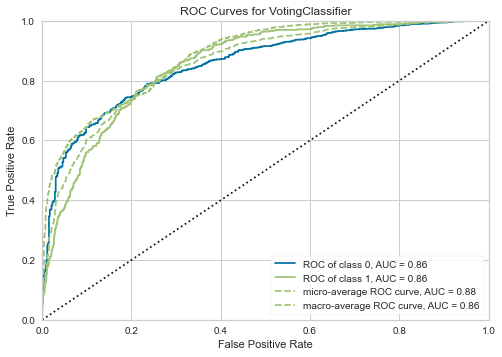

In [29]:
# Plot Model
plot_model(blend_specific)

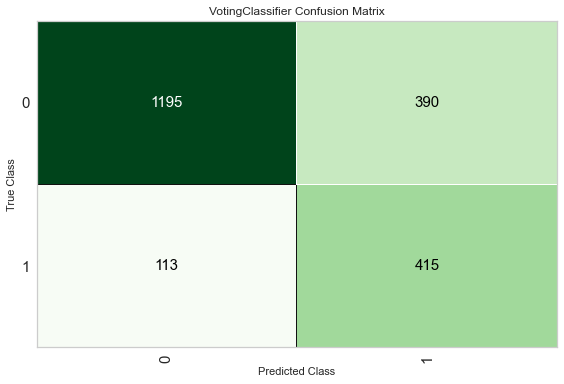

In [30]:
# Plot Confusion Matrix
plot_model(blend_specific, plot = 'confusion_matrix')

In [31]:
# Tune Model
tuned_blend = tune_model(blend_specific)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7789,0.8369,0.6567,0.5828,0.6175,0.4628,0.4645
1,0.7951,0.8431,0.5821,0.6341,0.6070,0.4688,0.4696
2,0.7890,0.8290,0.6642,0.6014,0.6312,0.4840,0.4852
3,0.7566,0.8039,0.6343,0.5449,0.5862,0.4152,0.4176
4,0.8053,0.8439,0.6418,0.6418,0.6418,0.5081,0.5081
5,0.8093,0.8659,0.7164,0.6316,0.6713,0.5378,0.5399
6,0.7830,0.8321,0.7090,0.5828,0.6397,0.4865,0.4913
7,0.8032,0.8596,0.6791,0.6276,0.6523,0.5154,0.5162
8,0.7647,0.8151,0.6343,0.5592,0.5944,0.4296,0.4313
9,0.7890,0.8401,0.6741,0.6026,0.6364,0.4884,0.4900


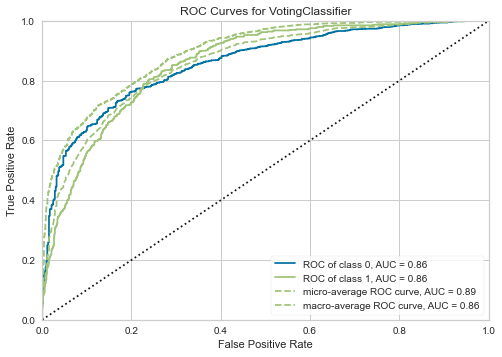

In [32]:
# Plot Model
plot_model(tuned_blend)

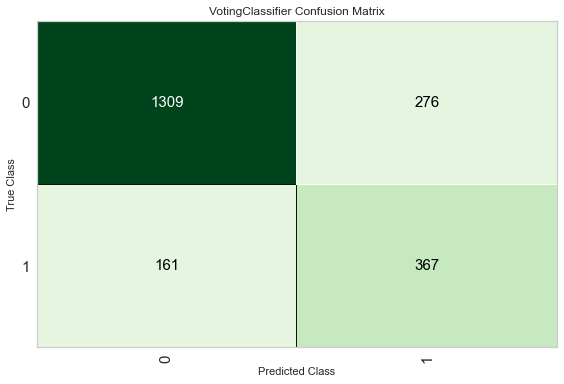

In [33]:
# Plot Confusion Matrix
plot_model(tuned_blend, plot = 'confusion_matrix')

## Stack Models

In [34]:
# stack trained models
stacked_models = stack_models(estimator_list=[lr,ada,nb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7931,0.8358,0.5224,0.6481,0.5785,0.4435,0.4480
1,0.8073,0.8449,0.5075,0.7010,0.5887,0.4671,0.4775
2,0.7951,0.8270,0.5597,0.6410,0.5976,0.4610,0.4629
3,0.7627,0.8004,0.5000,0.5726,0.5339,0.3757,0.3772
4,0.8154,0.8423,0.5149,0.7263,0.6026,0.4869,0.4991
5,0.8215,0.8690,0.5746,0.7130,0.6364,0.5199,0.5252
6,0.8053,0.8353,0.6343,0.6439,0.6391,0.5058,0.5058
7,0.8073,0.8594,0.5672,0.6726,0.6154,0.4881,0.4912
8,0.7769,0.8184,0.5448,0.5984,0.5703,0.4201,0.4209
9,0.8134,0.8432,0.5778,0.6903,0.6290,0.5057,0.5092


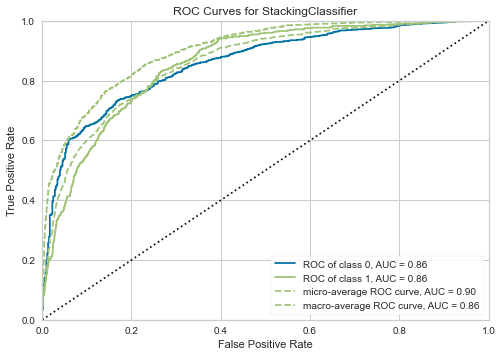

In [35]:
# Plot Model
plot_model(stacked_models)

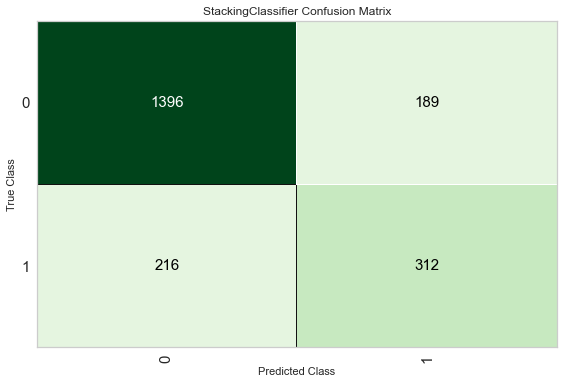

In [36]:
# Plot Confusion Matrix
plot_model(stacked_models, plot = 'confusion_matrix') 